In [1]:
# IMPORTS ET CONFIGURATION
# ============================================


import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import os
from datetime import datetime


print("✅ Bibliothèques importées")
print(f"📅 Date : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


# ==============================================================================
# CONFIGURATION PLOTLY
# ==============================================================================


# Thème sombre
pio.templates.default = "plotly_dark"


# Palette de couleurs cohérente avec le site
COLOR_SCALE = [
   '#E50914',  # Rouge cinéma
   '#D4AF37',  # Or
   '#00C853',  # Vert
   '#1E88E5',  # Bleu
   '#9C27B0',  # Violet
]


# Configuration globale des graphiques (boutons, export, etc.)
config = {
   'displayModeBar': True,
   'displaylogo': False,
   'modeBarButtonsToRemove': ['lasso2d', 'select2d'],
   'toImageButtonOptions': {
       'format': 'png',
       'filename': 'movie_analysis',
       'height': 1080,
       'width': 1920,
       'scale': 2
   }
}


print("✅ Plotly configuré en mode dark")


# ==============================================================================
# CHARGEMENT DES DONNÉES
# ==============================================================================


df = pd.read_csv('../data/processed/movies_clean.csv')


# Créer le dossier outputs si nécessaire
os.makedirs('../outputs/figures', exist_ok=True)


print(f"\n📊 Dataset chargé : {len(df):,} films")
print(f"📅 Période : {int(df['release_year'].min())} - {int(df['release_year'].max())}")
print(f"💰 Montants ajustés inflation 2024")
print(f"\n✅ Prêt pour créer 3 visualisations interactives !")


✅ Bibliothèques importées
📅 Date : 2026-01-18 22:27:17
✅ Plotly configuré en mode dark

📊 Dataset chargé : 7,632 films
📅 Période : 1980 - 2023
💰 Montants ajustés inflation 2024

✅ Prêt pour créer 3 visualisations interactives !



GRAPHIQUE 1 : SCATTER BUDGET VS REVENUE (INTERACTIF)
✅ Données préparées : 7,632 films


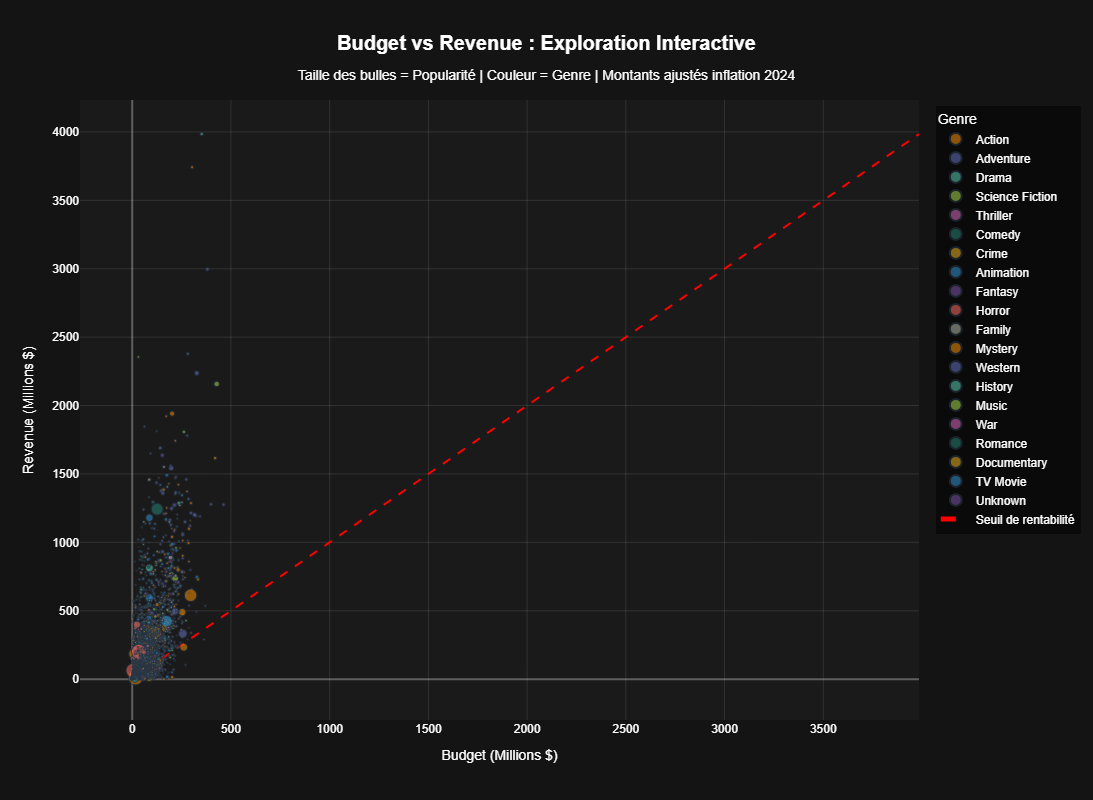


💾 Sauvegardé : interactive_scatter_budget_revenue.html
✅ Graphique 1 terminé


In [4]:
print("\n" + "="*80)
print("GRAPHIQUE 1 : SCATTER BUDGET VS REVENUE (INTERACTIF)")
print("="*80)

# Préparer les données pour le scatter
df_scatter = df.copy()

# Ajouter une colonne pour la taille des bulles (basée sur popularité)
df_scatter['bubble_size'] = df_scatter['popularity'] / 2

# Texte au survol personnalisé
df_scatter['hover_text'] = (
    '<b>' + df_scatter['title'] + '</b><br>' +
    '<br>📅 ' + df_scatter['release_year'].astype(str) +
    '<br>🎭 ' + df_scatter['main_genre'] +
    '<br>🌍 ' + df_scatter['main_country'] +
    '<br><br>💰 Budget: $' + df_scatter['budget_million'].round(1).astype(str) + 'M' +
    '<br>💵 Revenue: $' + df_scatter['revenue_million'].round(1).astype(str) + 'M' +
    '<br>📈 ROI: ' + df_scatter['roi'].round(2).astype(str) +
    '<br>⭐ Note: ' + df_scatter['vote_average'].round(1).astype(str) + '/10' +
    '<br>👥 Votes: ' + df_scatter['vote_count'].astype(str)
)

print(f"✅ Données préparées : {len(df_scatter):,} films")
# Créer le scatter plot interactif
fig1 = px.scatter(
    df_scatter,
    x='budget_million',
    y='revenue_million',
    color='main_genre',
    size='bubble_size',
    hover_data={'hover_text': True, 'budget_million': False, 'revenue_million': False, 
                'main_genre': False, 'bubble_size': False},
    custom_data=['hover_text'],
    title='<b>Budget vs Revenue : Exploration Interactive</b><br><sub>Taille des bulles = Popularité | Couleur = Genre | Montants ajustés inflation 2024</sub>',
    labels={
        'budget_million': 'Budget (Millions $)',
        'revenue_million': 'Revenue (Millions $)',
        'main_genre': 'Genre'
    },
    color_discrete_sequence=px.colors.qualitative.Vivid,
    opacity=0.6,
    height=800
)

# Personnaliser le hover template
fig1.update_traces(
    hovertemplate='%{customdata[0]}<extra></extra>'
)

# Ajouter une ligne de seuil de rentabilité (y = x)
max_val = max(df_scatter['budget_million'].max(), df_scatter['revenue_million'].max())
fig1.add_trace(
    go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        name='Seuil de rentabilité',
        line=dict(color='red', width=2, dash='dash'),
        hovertemplate='Seuil : Revenue = Budget<extra></extra>'
    )
)

# Mise en page
fig1.update_layout(
    template='plotly_dark',
    plot_bgcolor='#1a1a1a',
    paper_bgcolor='#141414',
    font=dict(family='Arial, sans-serif', size=12, color='white'),
    title_font_size=20,
    title_x=0.5,
    xaxis=dict(
        showgrid=True,
        gridcolor='rgba(255,255,255,0.1)',
        zeroline=True,
        zerolinecolor='rgba(255,255,255,0.3)'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='rgba(255,255,255,0.1)',
        zeroline=True,
        zerolinecolor='rgba(255,255,255,0.3)'
    ),
    legend=dict(
        orientation='v',
        yanchor='top',
        y=0.99,
        xanchor='left',
        x=1.02,
        bgcolor='rgba(0,0,0,0.5)'
    ),
    hovermode='closest'
)

# Afficher
fig1.show(config=config)

# Sauvegarder en HTML
fig1.write_html(
    '../outputs/figures/interactive_scatter_budget_revenue.html',
    config=config
)

print("\n💾 Sauvegardé : interactive_scatter_budget_revenue.html")
print("✅ Graphique 1 terminé")